### Libraries

In [5]:
import os
import cv2  # OpenCV
import numpy as np
import pandas as pd

### Haar Cascades Classifier

In [19]:
'''OpenCV provides options to used pre-trained models, that can be read using 'CascadeClassifier' method 
and an instance 'face_detection' is created with 'haarcascade_frontalface_default.xml'.'''

face_detection = cv2.CascadeClassifier(
    r'E:\Face-Detection-in-Python-using-OpenCV\data\haarcascades\haarcascade_frontalface_default.xml'
)

In [9]:
'''Passing the train images into 'detectMulitScale' method of face_detect instance to detect the faces
in a given image.'''

faces_found = []  # To get the face counts
for i in os.listdir(r'E:\Face_Count\train_HNzkrPW (1)\train_images\train'):
    img = cv2.imread(
        "E:\\Face_Count\\train_HNzkrPW (1)\\train_images\\train\\" + i, 0)
    faces = face_detection.detectMultiScale(img)
    faces_found.append(len(faces))

In [10]:
'''Importing the training dataset which comprises of Head Count which is a traget variable to compare with
the predicted head counts.'''

df = pd.read_csv(r'E:\Face_Count\train_HNzkrPW (1)\train.csv')
result = pd.DataFrame({
    "Images":
    df.iloc[:, 0].values,
    "Head Count":
    df.iloc[:, 1].values,
    "Predicted Head Count":
    np.array(faces_found, dtype='int64')
})
print(result.head())
print('\n')
print(result.tail())

      Images  Head Count  Predicted Head Count
0  10001.jpg           4                     1
1  10002.jpg           4                     2
2  10003.jpg           2                     1
3  10004.jpg           3                     1
4  10006.jpg           4                     3


         Images  Head Count  Predicted Head Count
5728  18201.jpg           2                     0
5729  18203.jpg           3                     4
5730  18204.jpg           5                     4
5731  18205.jpg           8                     5
5732  18207.jpg           4                     4


In [11]:
print('Accuracy of prediction is {}%'.format(
    round(
        np.mean(result['Head Count'] == result['Predicted Head Count']) * 100,
        2)))

Accuracy of prediction is 22.29%


### Libraries for Visualization 

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 

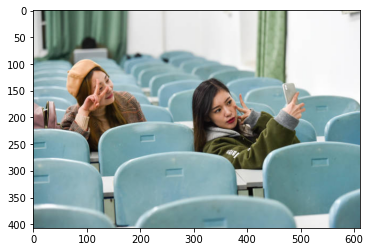

In [13]:
'''Visualizing the test image with predicted bounding boxes.'''

image = cv2.imread(r'E:/Face_Count/image_data/18201.jpg')
faces = face_detection.detectMultiScale(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax = plt.gca()
for i in faces:
    boxes = Rectangle((i[0],i[1]), i[2], i[3], fill = False, color = 'red')
    ax.add_patch(boxes)
plt.show()

From the above image, we can see that model has failed to detect the faces in the image.